#### This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. Silhouette Analysis
3. k-means clustering

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [28]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [29]:
# Setting Path
path= r'/Users/pierremora/Desktop/LinkedIn Job Postings 2023'

In [30]:
jobs_link= pd.read_csv(os.path.join(path, 'DATA', 'CLEAN DATA', 'cleaned_dataset.csv'))

In [31]:
jobs_link.head()

,max_salary,min_salary,applies,views,sponsored,company_size,employee_count,follower_count
0,75121.513511,59752.479787,1.0,17.0,0.0,2,48,14476
1,42000.000000,37000.000000,5.0,49.0,1.0,2,40,563
2,80000.000000,60000.000000,28.0,82.0,1.0,2,95,736
3,64320.022344,49230.847969,4.0,14.0,0.0,6,11000,342625
4,48016.450000,24411.900000,27.0,81.0,0.0,5,871,29587


### Standarazing Data

In [32]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
data_scaled = scaler.fit_transform(jobs_link)

# The result is a NumPy array. We want to convert it back to a DataFrame:
data_scaled_final = pd.DataFrame(data_scaled, columns=jobs_link.columns)



In [36]:
#exporting dataframe to csv.

data_scaled_final.to_csv(os.path.join(path, 'DATA','CLEAN DATA', 'data_scaled_final.csv'))

### Elbow technique

In [37]:
num_cl = range(1, 5) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [38]:
score = [kmeans[i].fit(data_scaled_final).score(data_scaled_final) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

[-53208.000000000015,
 -44280.5373727398,
 -33422.442318043846,
 -26798.032104409056]

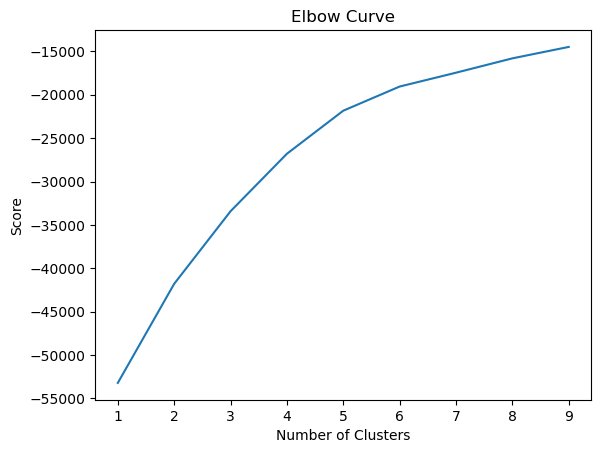

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Note: If the line on the elbow curve plot is relatively linear and doesn't show a clear "elbow," it indicates that there isn't a clear-cut answer to the optimal number of clusters.

### Silhouette Analysis: Instead of using the elbow method, we can use silhouette analysis to assess the quality of the clusters. The silhouette score measures how similar an object is to its own cluster compared to other clusters. 

In [40]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining the specific cluster numbers we want to test
cluster_numbers = [2,3, 4, 5,6, 7, 9,10]

# Initializing a dictionary to hold the silhouette scores
silhouette_scores = {}

# Calculate silhouette scores for the specified cluster numbers
for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled_final)
    silhouette_avg = silhouette_score(data_scaled_final, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg

# Print the silhouette scores for each cluster number
for n_clusters, score in silhouette_scores.items():
    print(f"Silhouette score for n_clusters={n_clusters}: {score}")


/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

Silhouette score for n_clusters=2: 0.3264436347220262
Silhouette score for n_clusters=3: 0.31162627348554633
Silhouette score for n_clusters=4: 0.27479396454455496
Silhouette score for n_clusters=5: 0.29408727510400673
Silhouette score for n_clusters=6: 0.2736930061369995
Silhouette score for n_clusters=7: 0.28655855424890286
Silhouette score for n_clusters=9: 0.3025965878436453
Silhouette score for n_clusters=10: 0.3187258886524551


#### Ten Clusters: Interestingly, n_clusters=10 has a higher score (0.319) than any of the other larger numbers of clusters, suggesting that if we are looking for more granularity, ten clusters might provide a relatively better structure compared to four, five, six, or seven clusters.

###  k-means clustering

In [43]:
kmeans = KMeans(n_clusters=10)


In [44]:
# Fit the k-means object to the data.

kmeans.fit(data_scaled_final)

/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [45]:
data_scaled_final['clusters'] = kmeans.fit_predict(data_scaled_final)

/Users/pierremora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
data_scaled_final.head(5)

,max_salary,min_salary,applies,views,sponsored,company_size,employee_count,follower_count,clusters
0,-0.120801,-0.003943,-0.463894,-0.532824,-0.745025,-1.262174,-0.222135,-0.229693,0
1,-0.708056,-0.586735,-0.347343,-0.252993,1.342237,-1.262174,-0.222244,-0.234678,8
2,-0.034304,0.002397,0.322823,0.035582,1.342237,-1.262174,-0.221493,-0.234616,8
3,-0.312315,-0.273449,-0.376481,-0.559058,-0.745025,0.731111,-0.072533,-0.112121,4
4,-0.601383,-0.909172,0.293686,0.026838,-0.745025,0.232790,-0.210893,-0.224279,9


In [48]:
data_scaled_final['clusters'].value_counts()

clusters
4    1742
0    1145
1     945
8     693
9     636
3     609
6     554
5     237
7      46
2      44
Name: count, dtype: int64

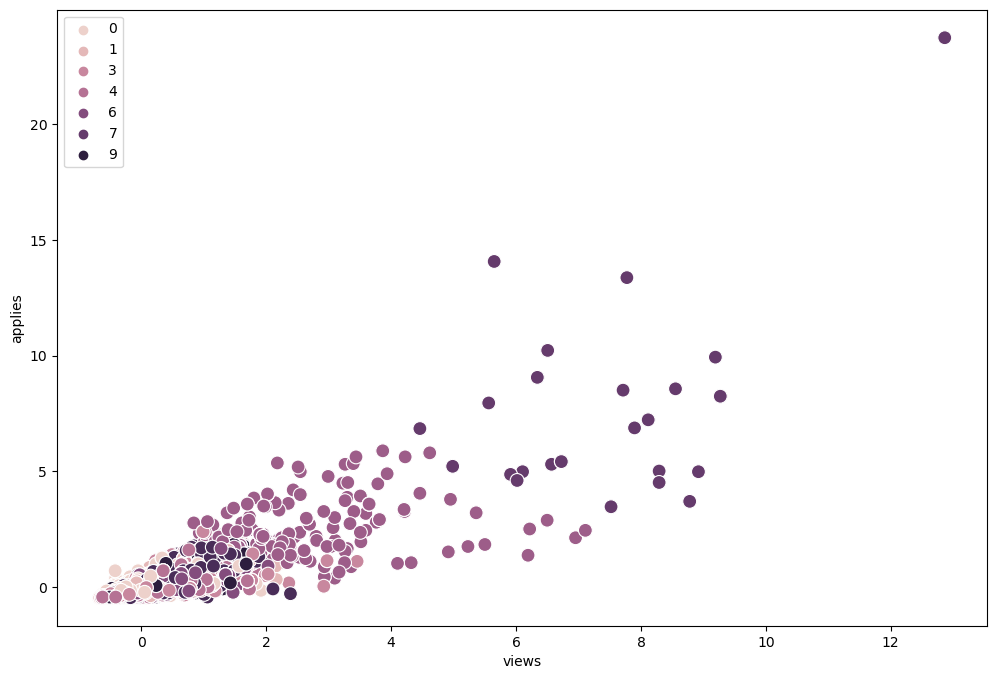

In [49]:
# Plot the clusters for the "views" and "applies" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_scaled_final['views'], y=data_scaled_final['applies'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('views') # Label x-axis.
plt.ylabel('applies') # Label y-axis.
plt.show()

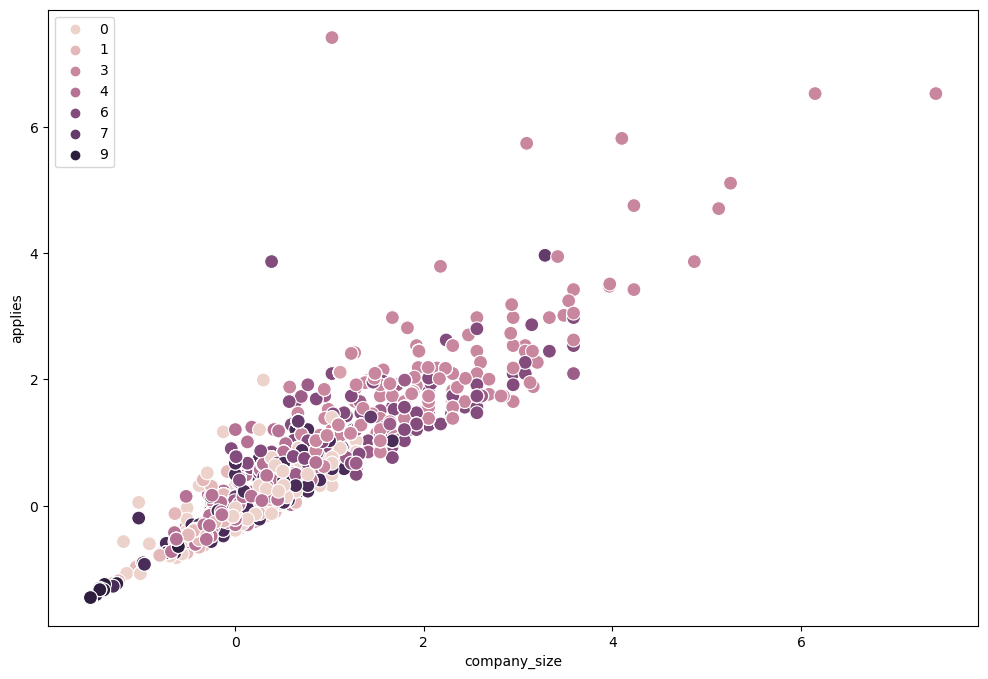

In [52]:
# Plot the clusters for the "company_size" and "applies" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_scaled_final['min_salary'], y=data_scaled_final['max_salary'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('company_size') # Label x-axis.
plt.ylabel('applies') # Label y-axis.
plt.show()

#### when the company_size is greater than 4, there is no clusters exept cluster number 3, this cluster is the only one that applies to this type of jobs

#### cluster 9 dont apply when the company_size is greater than 2

In [53]:
data_scaled_final.loc[data_scaled_final['clusters'] == 4, 'cluster'] = 'light purple'
data_scaled_final.loc[data_scaled_final['clusters'] == 0, 'cluster'] = 'pink'
data_scaled_final.loc[data_scaled_final['clusters'] == 1, 'cluster'] = 'cream'
data_scaled_final.loc[data_scaled_final['clusters'] == 8, 'cluster'] = 'dark purple'
data_scaled_final.loc[data_scaled_final['clusters'] == 9, 'cluster'] = 'black'
data_scaled_final.loc[data_scaled_final['clusters'] == 3, 'cluster'] = 'lightless purple'
data_scaled_final.loc[data_scaled_final['clusters'] == 6, 'cluster'] = 'purple'
data_scaled_final.loc[data_scaled_final['clusters'] == 5, 'cluster'] = 'mid-purple'
data_scaled_final.loc[data_scaled_final['clusters'] == 7, 'cluster'] = 'black purple'
data_scaled_final.loc[data_scaled_final['clusters'] == 2, 'cluster'] = 'dark cream'

In [55]:
data_scaled_final.groupby('cluster').agg({'min_salary':['mean', 'median'], 
                         'max_salary':['mean', 'median'], 
                         'applies':['mean', 'median'],
                          'views':['mean', 'median'],
                          'company_size': ['mean','median'],
                          'follower_count':['mean','median'],
                           'employee_count': ['mean','median']})

min_salary           max_salary             applies  \
                       mean    median       mean    median      mean   
cluster                                                                
black             -1.486877 -1.533701  -1.407165 -1.452020 -0.082447   
black purple      -0.025434 -0.009763   0.115111  0.098673  7.483725   
cream             -0.604333 -0.436138  -0.617046 -0.442101 -0.208808   
dark cream         1.114063  1.114063   2.114609  2.114609  0.147997   
dark purple       -0.114031 -0.003943  -0.170146 -0.122956 -0.007109   
light purple      -0.092180 -0.125675  -0.126217 -0.162660 -0.265601   
lightless purple   1.727504  1.795407   1.791655  1.650075 -0.088262   
mid-purple         0.289116  0.258541   0.284060  0.054347  2.764118   
pink              -0.047621 -0.021923  -0.103671 -0.140106 -0.168344   
purple             1.159668  1.026974   1.223414  1.147470 -0.075795   

                               views           company_size            \
                    median      mean    median         mean    median   
cluster                                                                 
black            -0.347343 -0.132341 -0.366674    -0.212252  0.232790   
black purple      7.228454  7.499002  7.521053     0.156958  0.481950   
cream            -0.376481 -0.236114 -0.401653     0.560258  0.731111   
dark cream        0.147997  0.586499  0.586499     1.229432  1.229432   
dark purple      -0.230793  0.056416 -0.130567    -1.195299 -1.262174   
light purple     -0.376481 -0.269403 -0.392908     0.773734  0.731111   
lightless purple -0.289068 -0.019585 -0.235504     0.276157  0.232790   
mid-purple        2.479012  2.705818  2.379164    -0.400099 -0.265531   
pink             -0.318206 -0.238696 -0.366674    -1.102885 -1.262174   
purple           -0.259930  0.019308 -0.078099     0.386603  0.731111   

                 follower_count            employee_count             
                           mean     median           mean     median  
cluster                                                               
black                 -0.124390  -0.217088      -0.161828  -0.212914  
black purple           0.077976  -0.173777       0.033587  -0.184284  
cream                 -0.067947  -0.196129      -0.037350  -0.168438  
dark cream            11.190269  11.190229      11.102643  11.102643  
dark purple           -0.224532  -0.232937      -0.221117  -0.221889  
light purple           0.086152  -0.148020       0.055190  -0.116620  
lightless purple      -0.099700  -0.202362      -0.095218  -0.193108  
mid-purple            -0.118428  -0.216233      -0.144104  -0.217818  
pink                  -0.224540  -0.232904      -0.220772  -0.221780  
purple                -0.002219  -0.181498       0.090568  -0.169545

## NOTE 
The KMeans clustering analysis has revealed that the numerical variables within the LinkedIn IT job market dataset do NOT exhibit strong correlations or distinct groupings when considered in isolation. 

This suggests that the complexity and nuances of the job market are not fully captured by numerical data alone. The dispersed nature of clusters across multiple visualizations indicates that the dataset may be inherently heterogeneous, with significant overlap in numerical feature space across different clusters.

Incorporating Categorical Data: Algorithms that handle mixed data types should be considered to incorporate the rich context provided by categorical variables such as job titles, company locations, and industry specifics.